In [75]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt 
plt.rc("font", size=13)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, random_split, DataLoader

In [76]:
data = pd.read_csv("bank_data.csv", header=0, sep=";")

In [77]:
data

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5,0,47766,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22,0,153045,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12,1,109554,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8,0,404225,738254.0,0.0,0.0


In [78]:
#drop duplicates 
columns_to_drop = ['Loan ID', 'Customer ID']
data.drop(columns_to_drop, axis = 1, inplace = True)
data.drop_duplicates(inplace = True)

In [79]:
#overview of how many missing values are present in the dataset:
data.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             3802
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    48337
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      190
Tax Liens                           9
dtype: int64

Here we define a function for the calculus in percentage of how many missing values we have for each category:

In [81]:
def missing_values_table(df):
  mis_val = df.isnull().sum()
  mis_val_percent = 100*df.isnull().sum() / len(df)
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  mis_val_table_ren_columns = mis_val_table.rename(columns = {0:'Missing Values' , 1:'% of Total Values'})
  return mis_val_table_ren_columns.round(1)

In [82]:
missing_values_table(data)

,Missing Values,% of Total Values
Loan Status,0,0.0
Current Loan Amount,0,0.0
Term,0,0.0
Credit Score,19154,21.3
Annual Income,19154,21.3
Years in current job,3802,4.2
Home Ownership,0,0.0
Purpose,0,0.0
Monthly Debt,0,0.0
Years of Credit History,0,0.0


In [83]:
#drop the columns with >50% missing 
data=data.drop(columns="Months since last delinquent", axis=1)





In [84]:
data.shape

(89785, 16)

In [85]:
data["Bankruptcies"].fillna(data["Bankruptcies"].mode()[0], inplace=True) 
data["Credit Score"].fillna(data["Credit Score"].mode()[0], inplace=True) 
data["Annual Income"].fillna(data["Annual Income"].mode()[0], inplace=True) 
data["Years in current job"].fillna(data["Years in current job"].mode()[0], inplace=True) 
data["Maximum Open Credit"].fillna(data["Maximum Open Credit"].mode()[0], inplace=True) 


In [90]:
data.isnull().sum()


Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    9
dtype: int64

In [101]:
#individuate categorical variables to do correlation
categorical_columns = data.select_dtypes(exclude=['number']).columns

label_encoder = LabelEncoder()

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
    




Purpose                   -0.009370
Years of Credit History   -0.011407
Term                      -0.045592
Current Loan Amount       -0.088168
Loan Status               -0.396032
Name: Credit Score, dtype: float64


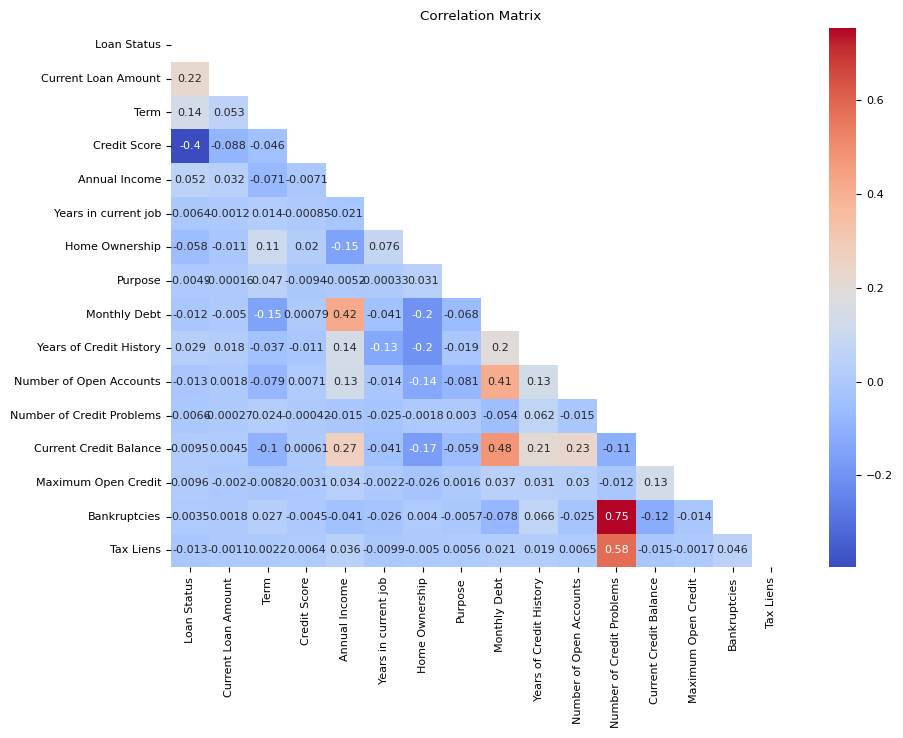

In [103]:
#correlation of each column with credit score
correlations_data = data.corr()['Credit Score'].sort_values(ascending=False)

print(correlations_data.tail()) 

#correlation of each column with each other
correlation_matrix = data.corr()
plt.figure(figsize=(10, 7))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.rcParams['font.size'] = 8
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm',annot=True)
plt.title('Correlation Matrix')
plt.show()

